In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import copy
from itertools import chain, combinations

Written by: George Grattan (Applied Math '22) for Dinesh Mehta for CSCI 406, Algorithms, at Colorado School of Mines.

Notes: I use the networkx package for the graph implementation for this, with the students we will need to specify what packages they use as they can drastically impact the time complexity. We even may need to have them develop their own graph implementation to standardize things for grading purposes.



Last Edited: 7/26/2021

In [ ]:
#Input: integer for the number of nodes
#output: edges: A list of strings that allow for easy input
#        graph: a networkx graph that will be used to find the output
#NOTE: Within the function there is  this line "if (rand.random()<0.15):" You can alter the .15 to change the likelihood an edge connects two nodes, and thus alter the connectedness of the graph
def generate_edges(n):
  #This is the set of edges
  edges=set()
  #I also store the graph as a networkx graph to simplify generating output later
  graph=nx.Graph()
  for i in range(1,n+1):
    graph.add_node(i)

  #iterate through indicies [1,n]
  for i in range(1,n+1):
    #do it again
    for j in range(1,n+1):
    
      #if the indicies are not the same
      if (i!=j):

        #create an edge between them represented as a tuple
        edge=(i,j)
        #if the edge does not already exist

        if ((edge not in edges) and (edge[::-1] not in edges)):

          #try to add the edge with a 15% success rate
          if (rand.random()<0.15):
            edges.add(edge)
            graph.add_edge(edge[0],edge[1])
          
  #return the set of edges
  return edges, graph
    


In [ ]:
#Input: egdes: The set of tuples representing the edges
#Output: the edges as a set of strings

#this function converts the list of edges to a list of strings that can easily be written to the file
def edges_to_strings(edges):
  new_edges=set()

  #iterate through the set
  for edge in edges:

    #create a string of the form "<first_node> <second_node>\n"
   new_edge=str(edge[0])+" "+str(edge[1])+"\n"

   #add the string to the new set 
   new_edges.add(new_edge)
   
  return new_edges
  


In [ ]:
#generates powerset of the array
def generate_powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [ ]:
#Input:
#   graph: networkx graph object
#   cover: a collection of nodes from that graph
#Output: Booleab value if the cover is a valid Vertex Cover of the graph

#Determine if the proposed cover is a valid vertex cover
def is_valid_VC(graph, cover):
  graph1=copy.deepcopy(graph)
  for node in cover:
    graph1.remove_node(node)
  if len(graph1.edges)==0:
    return True
  else:
    return False

In [ ]:
#Input: a networkx graph object
#Output: the exhaustive algorithm's minimum vertex cover, a list of verticies representing the cover

#This function will try every possible vertex cover solution and return the best one(s).
#it exploits the fact that the power set is sorted in increasing order, so the first valid vertex cover found will be the minimum cover
def exhaustive(graph):
  nodes=graph.nodes
  powerset=generate_powerset(nodes)
  for VC in powerset:
    if is_valid_VC(graph, VC):
      return len(VC)


  

In [ ]:
#input: newtorkx graph object
#Output: The node that connects to the most edges
def find_most_edges(graph):
  #create a list of nodes from the graph
  nodes = list(graph)
  #the current max node is the first node
  max_node=nodes[0]
  #the current max number of edges is the number of edges the first node has
  max_edges=len(graph.edges(max_node))
  #iterate through the nodes
  #calculate the current number of edges
  for node in nodes:
    curr_num=len(graph.edges(node))
    #if the current number of edges is greater than the max, reset max_node and max_edges
    if (curr_num>max_edges):
      max_node=node
      max_edges=curr_num
      #if it is the same, chooose the node wose integer label is SMALLER
    elif (curr_num==max_edges):
      if (node<max_node):
        max_node=node
        max_edges=curr_num
        #return the node with the most edges
  return max_node



In [ ]:
#Input: a networkx graph object
#Output: The greedy algorithm's minimum vertex cover, a list of verticies representing the cover

#This function implements the greedy algorithm as defined in the handout
def greedy(graph):
  graph1=copy.deepcopy(graph)
  VC=0
  while (len(graph1.edges) !=0):
    graph1.remove_node(find_most_edges(graph1))
    VC+=1
  return VC



In [22]:
#Input: n: the number of nodes
#       edges: the set of edges
#       iteration: which file iteration you want to use
#Output: A file representation of a random graph of n nodes
def create_input_file(n,edges, iteration,graph):
  #Create the filename based on interation
  filename="Vertex_Cover_Input_"
  filename+=str(iteration)

  #open the file
  f=open(filename,"w")

  #write the number of nodes and edges on the first two lines respectively
  f.write(str(n)+"\n")
  f.write(str(len(edges))+"\n")

  #write the edges
  edges=edges_to_strings(edges)
  f.writelines(edges)
  f.write("\n\n")
  #if n<=20 compute the exhaustive output.
  f.write("GREEDY OUTPUT:"+str(greedy(graph)))
  if (n<=20):
    f.write("EXHAUSTIVE OUTPUT: "+str(exhaustive(graph))+"\n")
  #close the file
  f.close()




In [ ]:
#Generate Input
#INput:
#   num_nodes: The number of nodes in the graph
#   num_files: The number of files you wish to generate
#   show_graph: Bool value if you want to print the graph, DEFAULT=True

#Output: Files with the input specifing each graph, and the output for the greedy and exhaustive (if n<=20) algorithms
    #if show_graph=True plots representing each graph randomly generated

def generate_input(num_nodes, num_files,show_graph=True):
  #iterate throught the number of files you want to make
  for iteration in range(1,num_files+1):
    #generate a random graph, and an input file relating to that graph
    edges,graph=generate_edges(num_nodes)
    #create_input_file uses both algorithms to add the expected output to the bottom of the graph
    create_input_file(num_nodes, edges, iteration,graph)
    #If true show the graph, default True
    if (show_graph):
      nx.draw(graph, with_labels=True)
      plt.show()
    

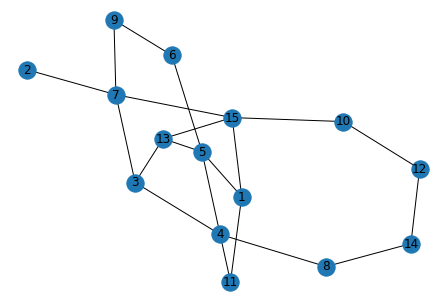

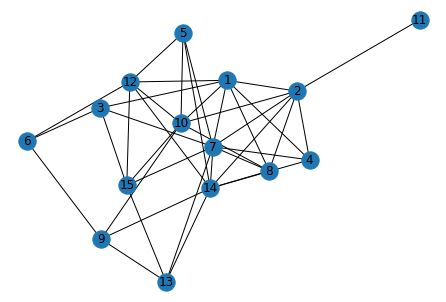

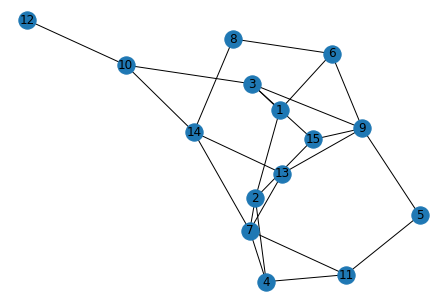

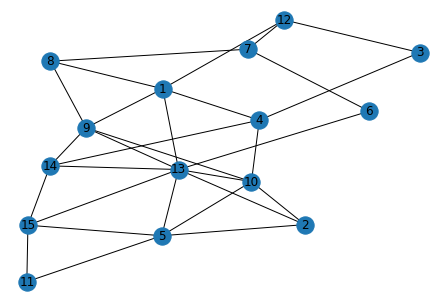

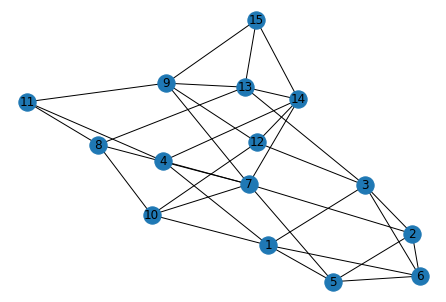

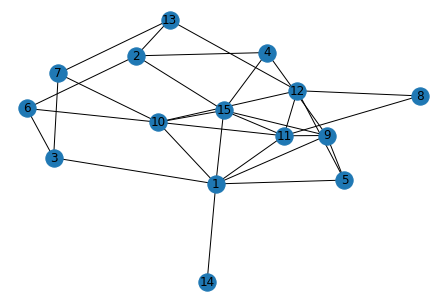

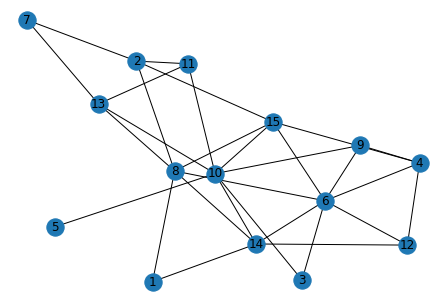

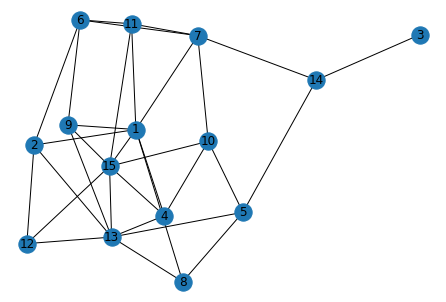

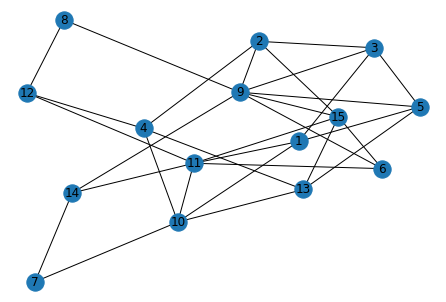

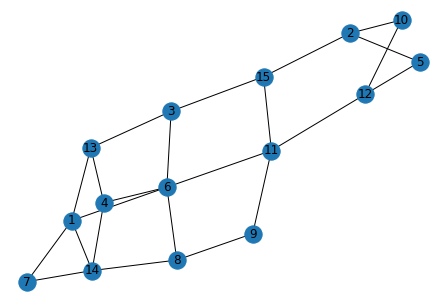

In [23]:
#driver code:
num_nodes=15
num_files=10
generate_input(num_nodes, num_files)